# FINAL PROJECT 
**Data Mining dan Visualisasi A**

oleh :
- Dini Athhirah Yasmin / 5003211033
- Tarbiyatul Latifah / 5003211098
- Elsa Maulida Pangesti / 5003211101

### Introduction
Final project ini mengggunakan *Hotel Reservation Dataset* yang bersumber pada [kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset). Dataset mengandung beberapa informasi tentang hotel bookings, termasuk beberapa features seperti booking history, customer details, dan reservation status. 

### Variabel
- **Booking_ID**: Identifier unik dari setiap pemesanan.
- **no_of_adults**: Jumlah dewasa yang menginap.
- **no_of_children**: Jumlah anak-anak yang menginap.
- **no_of_weekend_nights**: Jumlah malam akhir pekan (Sabtu atau Minggu) yang tamu menginap atau memesan untuk menginap di hotel.
- **no_of_week_nights**: Jumlah malam kerja (Senin hingga Jumat) yang tamu menginap atau memesan untuk menginap di hotel.
- **type_of_meal_plan**: Jenis rencana makan yang dipesan oleh pelanggan.
- **required_car_parking_space**: Apakah pelanggan membutuhkan tempat parkir mobil? (0 - Tidak, 1 - Ya)
- **room_type_reserved**: Jenis kamar yang dipesan oleh pelanggan.
- **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan.
- **arrival_year**: Tahun dari tanggal kedatangan.
- **arrival_month**: Bulan dari tanggal kedatangan.
- **arrival_date**: Tanggal dalam bulan dari tanggal kedatangan.
- **market_segment_type**: Penunjukan segmen pasar.
- **repeated_guest**: Apakah pelanggan adalah tamu yang berulang? (0 - Tidak, 1 - Ya)
- **no_of_previous_cancellations**:Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **no_of_previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh pelanggan sebelum pemesanan saat ini.
- **avg_price_per_room**: Harga rata-rata per hari dari reservasi; harga kamar dinamis (dalam euro).
- **no_of_special_requests**: Total jumlah permintaan khusus yang dibuat oleh pelanggan (mis. lantai tinggi, pemandangan dari kamar, dll).
- **booking_status**: Tanda menunjukkan apakah pemesanan dibatalkan atau tidak.

### Problem Statement

Pemesanan dan perilaku pelanggan secara dramatis. Sejumlah besar reservasi hotel dibatalkan karena pembatalan atau ketidakhadiran. Alasan umum pembatalan termasuk perubahan rencana, konflik penjadwalan, dll. Hal ini sering kali dipermudah dengan adanya pilihan untuk melakukannya secara gratis atau lebih disukai dengan biaya rendah yang bermanfaat bagi tamu hotel, namun hal ini merupakan faktor yang kurang diinginkan dan mungkin mengurangi pendapatan hotel.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
#import sklearn 

### Preprocessing

In [104]:
df = pd.read_csv("Hotel Reservations.csv")

In [105]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [106]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [107]:
df.shape

(36275, 19)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [109]:
#mengubah data ke bentuk string
df['arrival_year'] = df['arrival_year'].astype(str)
df['arrival_month'] = df['arrival_month'].astype(str)
df['arrival_date'] = df['arrival_date'].astype(str)

#membuat function validasi date
def is_valid_date(year, month, day):
    try:
        pd.to_datetime(f"{year}-{month}-{day}", format="%Y-%m-%d")
        return True
    except ValueError:
        return False

valid_dates = df.apply(lambda row: is_valid_date(row['arrival_year'], row['arrival_month'], row['arrival_date']), axis=1)
#membuat copy an df
df_valid = df[valid_dates].copy()
df_valid['arrival_date'] = pd.to_datetime(df_valid['arrival_year'] + '-' + df_valid['arrival_month'] + '-' + df_valid['arrival_date'], format='%Y-%m-%d')


In [110]:
df_valid

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,2018-02-28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,2018-05-20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,2018-04-11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,2018-08-03,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,2018-10-17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,2018-07-01,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,2018-04-21,Online,0,0,0,94.50,0,Canceled


In [111]:
#drop unnecessary columns
df_valid.drop(columns=['arrival_year', 'arrival_month','Booking_ID'], inplace=True)

In [112]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  object        
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  object        
 7   lead_time                             36238 non-null  int64         
 8   arrival_date                          36238 non-null  datetime64[ns]
 9   market_segment_type                   36238 non-null  object        
 10  rep

In [113]:
df_valid['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [114]:
df_valid['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [115]:
df_valid['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [116]:
df_valid['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [117]:
#data transformation
df_valid['type_of_meal_plan'] = df_valid['type_of_meal_plan'].map({
    'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})
df_valid['room_type_reserved'] = df_valid['room_type_reserved'].map({
    'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
df_valid['market_segment_type'] = df_valid['market_segment_type'].map({
    'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})
df_valid['booking_status'] = df_valid['booking_status'].map({
    'Not_Canceled': 0, 'Canceled': 1})
df_valid.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017-10-02,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018-11-06,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018-02-28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018-05-20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018-04-11,1,0,0,0,94.50,0,1


In [118]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  int64         
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  int64         
 7   lead_time                             36238 non-null  int64         
 8   arrival_date                          36238 non-null  datetime64[ns]
 9   market_segment_type                   36238 non-null  int64         
 10  rep

In [119]:
#cek missingg value
df_valid.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [124]:
#cek outlier

from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)
z_scores = df[numerical_cols].apply(zscore)
threshold = 3
outliers_zscore = z_scores[(z_scores > threshold) | (z_scores < -threshold)].dropna(how='all').index
print(f'Number of outliers detected using Z-score method: {len(outliers_zscore)}')
print(outliers_zscore)


Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')
Number of outliers detected using Z-score method: 4400
Index([    5,     9,    32,    35,    60,    72,    80,    84,    88,    91,
       ...
       36163, 36177, 36178, 36207, 36210, 36221, 36227, 36249, 36260, 36269],
      dtype='int64', length=4400)


Berdasarkan cek data oulier diatas terdapat sebesar 4400 data outlier, maka kami memutuskan untuk tidak menghapus outlier tersebut, karena kami ingin mempertahankan informasi yang ada pada dataset.

In [19]:
#deskriptif statistik
df_valid.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.949859,0.030934,1.708455,85.275070,2018-05-24 16:37:29.130746880,0.804432,0.025553,0.023346,0.152961,103.437259,0.619957,0.327777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017-07-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,17.000000,2018-02-28 00:00:00,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,57.000000,2018-06-12 00:00:00,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,1.000000,0.000000,1.000000,126.000000,2018-09-19 00:00:00,1.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,7.000000,443.000000,2018-12-31 00:00:00,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000
std,0.518572,0.402540,0.870992,1.410784,0.480313,0.173142,1.399451,85.953561,NaN,0.646656,0.157801,0.368483,1.753366,35.084264,0.786403,0.469410


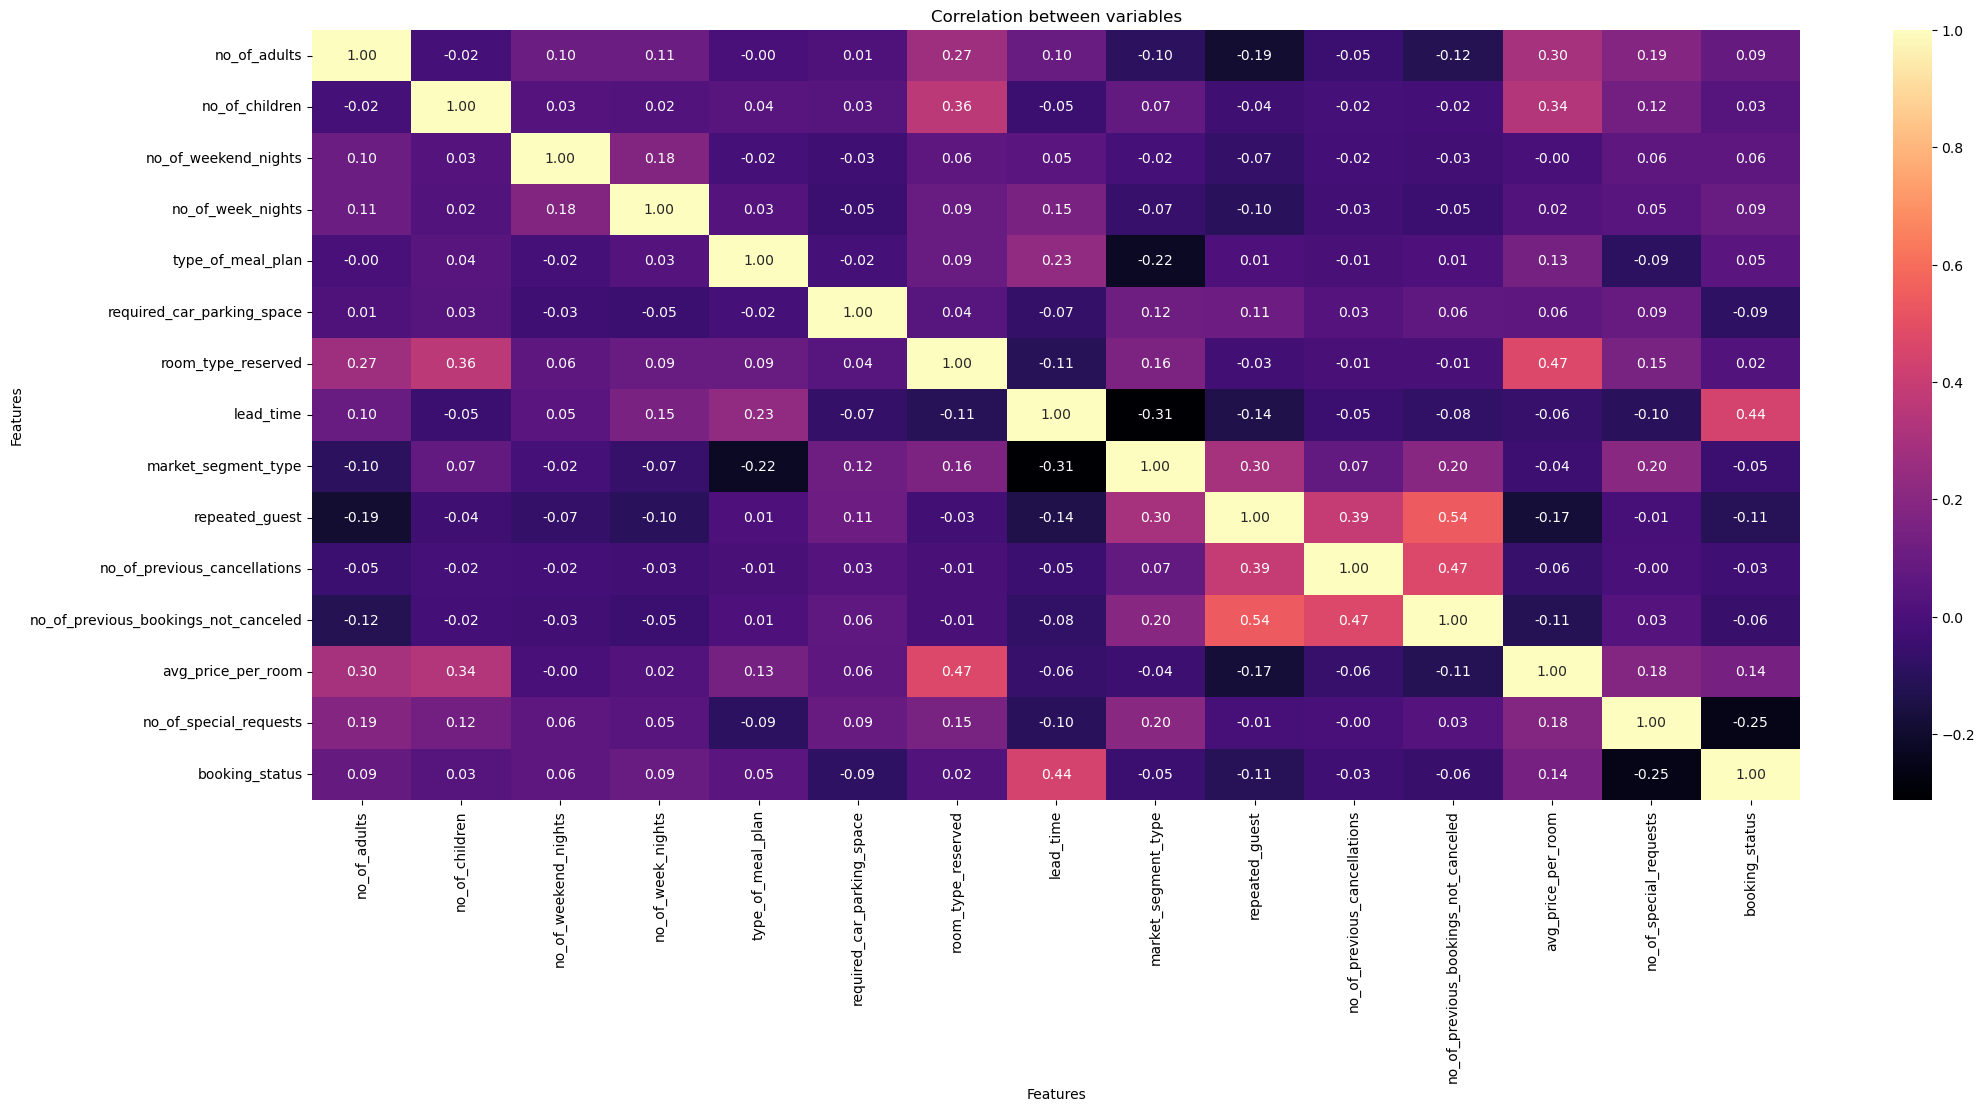

In [20]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df_valid.corr(numeric_only=True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**Interpretasi :** Berdasarkan heatmap, variabel yang memiliki korelasi yang cukup tinggi dengan variabel lainnya adalah room_type_reserved dengan avg_price_per_room sebesar 0.47, lead_time dengan booking_status sebesar 0.44, reapeted_guest dengan no_of_previous_booking_not_canceled sebesar 0.54, dan no_of_previous_cancellation dengan no_of_previous_booking_not_canceled sebesar 0.47. Dengan adanya nilai korelasi yang cukup tinggi antar variabel tersebut perlu dilakukan feature selection untuk mendapatkan feature(variabel) dengan korelasi yang rendah antar feature lainnya dan juga memiliki peran penting dalam analisis.

### Feature Selection

In [150]:
y = df_valid['booking_status']
X = df_valid.drop(columns=['booking_status','arrival_date'], axis=1) 
feature_names = X.columns.tolist()
target_names = y.unique().tolist()

- **Metode Wrapper RFE dengan decission tree classifier**

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
#using RFE with decission tree classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Akurasi dengan menggunakan seluruh fitur:", accuracy_all_features)

#feature selection using RFE
n_features_to_select = 5 
rfe_selector = RFE(estimator=clf, n_features_to_select=n_features_to_select, 
                   step=1)
X_train_selected = rfe_selector.fit_transform(X_train, y_train)
X_test_selected = rfe_selector.transform(X_test)

#train the classifier with selected features
clf_selected = clf
clf_selected.fit(X_train_selected, y_train)

#test the classifier with selected features
y_pred_selected = clf_selected.predict(X_test_selected)
accuracy_selected_features = accuracy_score(y_test, y_pred_selected)
print("Akurasi dengan fitur terpilih:", accuracy_selected_features)

#get the indices of the selected features
selected_feature_indices = rfe_selector.get_support(indices=True)
selected_feature_names = [feature_names[idx] for idx in selected_feature_indices]
print("Fitur terpilih:", selected_feature_names)


Akurasi dengan menggunakan seluruh fitur: 0.8573399558498896
Akurasi dengan fitur terpilih: 0.8443708609271523
Fitur terpilih: ['no_of_week_nights', 'lead_time', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']


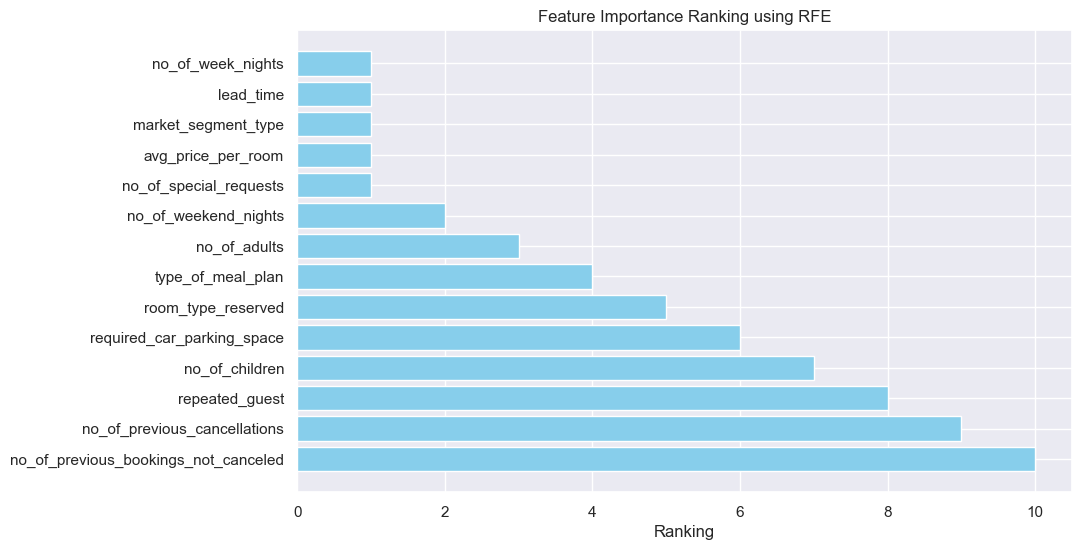

In [153]:
#get the ranking of the features
ranking = rfe_selector.ranking_
feature_ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': ranking})

#sort the DataFrame by ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

#plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_df['Feature'], feature_ranking_df['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.title('Feature Importance Ranking using RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

### Classification

In [154]:
X_train_original = X_train
X_test_original = X_test

In [155]:
selected_features = ['no_of_week_nights', 'lead_time', 'market_segment_type', 'avg_price_per_room',
                     'no_of_special_requests']

In [156]:
X_train = X_train_original[selected_features]
X_test = X_test_original[selected_features]

In [157]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm_train = MinMaxScaler().fit(X_train)

# transform training data
X_train[np.array(X_train.columns)] = norm_train.transform(X_train)

# fit scaler on test data
norm_test = MinMaxScaler().fit(X_test)

# transform test data
X_test[np.array(X_test.columns)] = norm_test.transform(X_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1040\4276655375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[np.array(X_train.columns)] = norm_train.transform(X_train)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1040\4276655375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[np.array(X_test.columns)] = norm_test.transform(X_test)


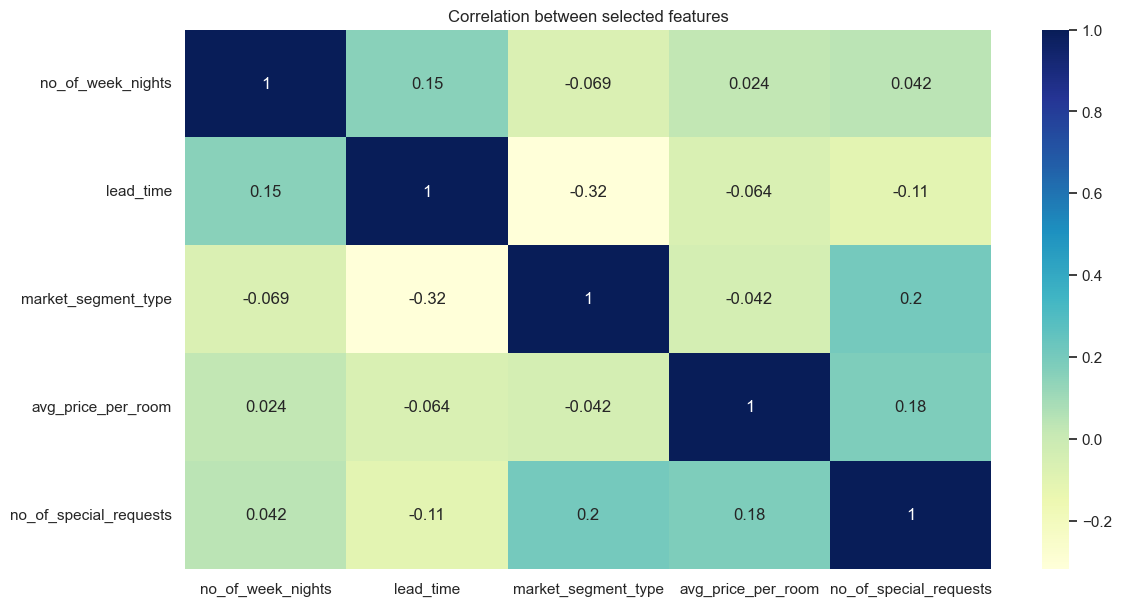

In [140]:
#heatmap untuk memastikan korelasi fitur terpilih sebelum dilakukan modelling

sns.set(rc={'figure.figsize':(13, 7)})
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation between selected features")
plt.show()

**Interpretasi :** Berdasarkan heatmap diatas, setiap fitur memiliki korelasi yang rendah dengan antar fitur yang lain, sehingga fitur terpilih telah siap untuk dilakukan analisis selanjutnya.

- **Logistic Regression**

In [141]:
from sklearn.linear_model import LogisticRegression

logical = LogisticRegression(max_iter=1000, random_state=42)
logical.fit(X_train,y_train)
logical_predict = logical.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

logical_predict = logical.predict(X_test)
acc_lr = accuracy_score(y_test, logical_predict)
f1_lr = f1_score(y_test, logical_predict, pos_label=0)
prec_lr = precision_score(y_test, logical_predict, pos_label=0)
rec_lr = recall_score(y_test,logical_predict, pos_label=0)
results_lr = pd.DataFrame([['Logistic regression', acc_lr, f1_lr, prec_lr, rec_lr]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_lr

,Model,Accuracy Score,F1 score,Precision,Recall
0,Logistic regression,0.700607,0.744405,0.880468,0.644766


**Interpretasi :** Berdasarkan model logistic regression diperoleh nilai accuracy sebesar 70,06% dan precission (not canceled) sebesar 88,04% , pada f1 sebesar 74,44% , dan sensitifitas memprediksi benar sebesar 64.47%. secara umum lebih dari 50%, sudah masuk kategori yang baik. 


- **Training and testing menggunakan repeated HoldOut and K-Fold CV (k=5)**

In [143]:
#repeated holdout (k=5)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import RepeatedKFold

# Initialize RepeatedKFold with 10 splits and 10 repetitions
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform RepeatedKFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit the Logistic Regression model
    logical = LogisticRegression(max_iter=1000, random_state=42)
    logical.fit(X_train, y_train)
    
    # Make predictions on the test set
    logical_predict = logical.predict(X_test)
    logical_predict_proba = logical.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, logical_predict))
    f1_scores.append(f1_score(y_test, logical_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, logical_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, logical_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, logical_predict_proba))

    # Calculate specificity
    tn = ((logical_predict == 0) & (y_test == 0)).sum()
    fp = ((logical_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, logical_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
# Compute average scores across all folds and repetitions
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_lr = pd.DataFrame([['Logistic Regression with repeated Holdout (k=5)', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                          columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_lr)

                                             Model  Accuracy Score  F1 score  \
0  Logistic Regression with repeated Holdout (k=5)        0.791605  0.852263   

   Precision    Recall       AUC  Specificity  
0   0.814081  0.894231  0.848742     0.894231  


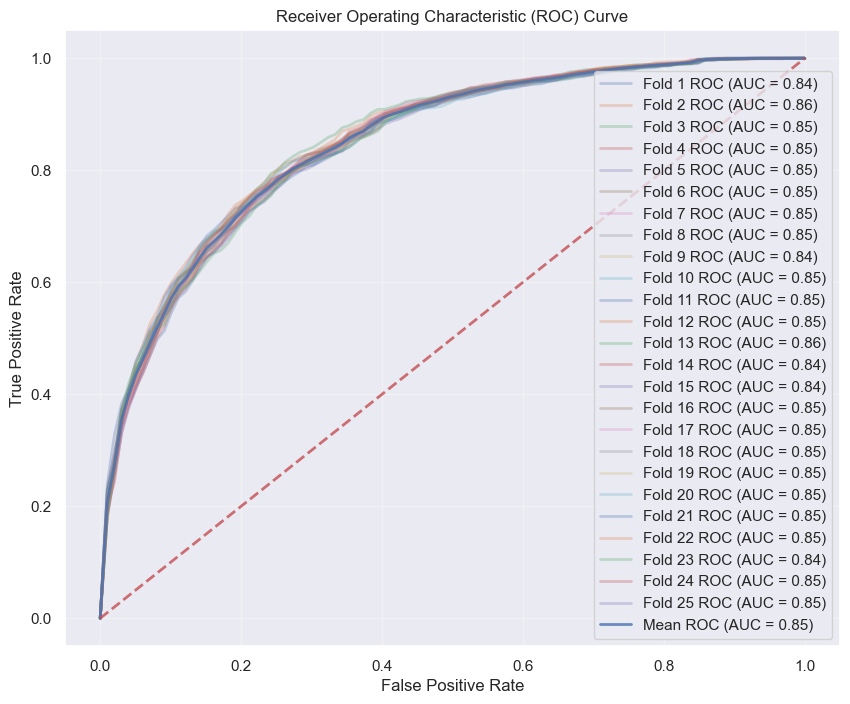

In [145]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [146]:
#KFold CV (k=5)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import KFold

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
fprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit the Logistic Regression model
    logical = LogisticRegression(max_iter=1000, random_state=42)
    logical.fit(X_train, y_train)
    
    # Make predictions on the test set
    logical_predict = logical.predict(X_test)
    logical_predict_proba = logical.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, logical_predict))
    f1_scores.append(f1_score(y_test, logical_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, logical_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, logical_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, logical_predict_proba))
    
    # Calculate specificity
    tn = ((logical_predict == 0) & (y_test == 0)).sum()
    fp = ((logical_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, tresholds = roc_curve(y_test, logical_predict_proba)
    fprs.append(fpr)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [147]:
# Average the performance metrics across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_lr = pd.DataFrame([['Logistic regression with KFold CV (k=5)', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                          columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'ROC&AUC', 'Specificity'])

print(results_lr)

                                     Model  Accuracy Score  F1 score  \
0  Logistic regression with KFold CV (k=5)        0.791903  0.852496   

   Precision    Recall   ROC&AUC  Specificity  
0   0.814198  0.894595  0.848691     0.894595  


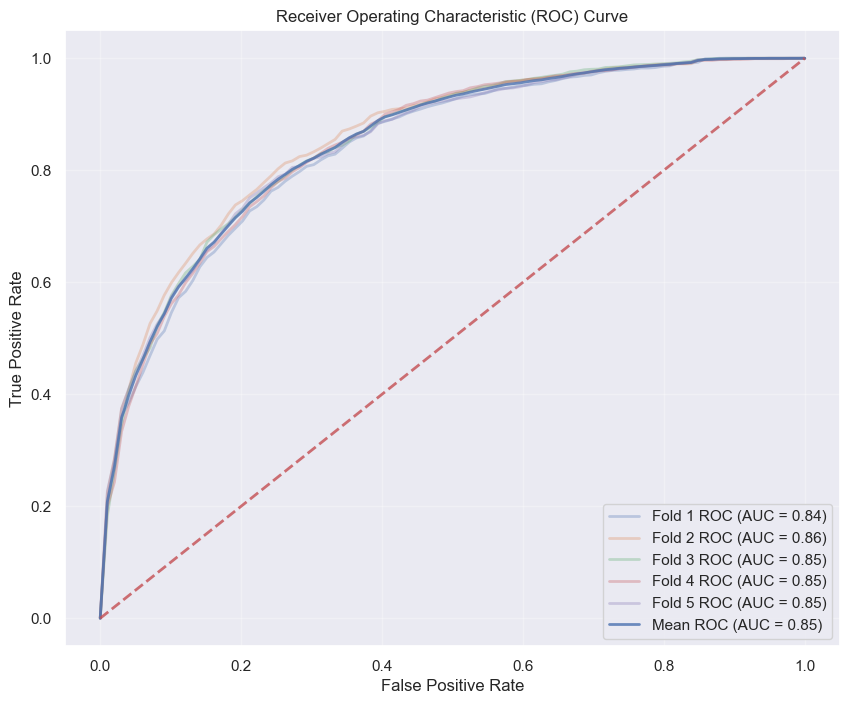

In [148]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**Interpretasi:** Dengan melakukan training and testing metode KFold Cross Validation (k=5) diperoleh hasil rata-rata accuracy, sensitifitas, presisi, spesificitas, dan ROC AUC yang sedikit lebih baik dibandingkan dengan menggunakan repeated holdout (k=5) yaitu berturut-turut sebesar 79.19%, 89.45%, 81.41%, 89.45%, dan 84.86% perbedaan hasil ini sangatlah kecil hanya 0.0... maka metode training and testing yang dipilih adalah dengan menggunakan **KFold CV**.

Kami menggunakan k=5 dikarenakan ketika dicoba menggunakan k=10 hasil yang diperoleh tidaklah berbeda secara signifikan dengan menggunakan k=5.

- **KNN**

In [158]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predict = knn.predict(X_test)

acc_knn = accuracy_score(y_test,knn_predict)
f1_knn = f1_score(y_test,knn_predict, pos_label=0)
prec_knn = precision_score(y_test,knn_predict, pos_label=0)
rec_knn = recall_score(y_test,knn_predict, pos_label=0)
results_knn = pd.DataFrame([['KNN', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.760762,0.814466,0.856243,0.776576


**Interpretasi :** Berdasarkan model K-nearest neighbors diperoleh nilai accuracy sebesar 76,07%, precission sebesar 85,62%, dan sensitifitas sebesar 77.65%  Nilai-nilai tersebut jelas lebih baik dibandingkan dengan menggunakan metode klasifikasi sebelumnya yaitu logistic regression (tanpa model evaluation). 

- **Training and testing menggunakan repeated HoldOut and K-Fold CV (k=5)**

In [159]:
# repeated holdout (k=5)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedKFold

#inisialisasi dengan n_repeats=5 dan n_split=5
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

# Initialize lists to store performance metrics for each repetition
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform Repeated KFold cross-validation
for train_index, test_index in rkf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    # Fit the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    knn_predict = knn.predict(X_test)
    knn_predict_proba = knn.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, knn_predict))
    f1_scores.append(f1_score(y_test, knn_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, knn_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, knn_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, knn_predict_proba))
    
    # Calculate specificity
    tn = ((knn_predict == 0) & (y_test == 0)).sum()
    fp = ((knn_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, knn_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [160]:
# Compute average scores across all folds and repetitions
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_knn = pd.DataFrame([['KNN', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'ROC AUC', 'Specificity'])

print(results_knn)

  Model  Accuracy Score  F1 score  Precision    Recall   ROC AUC  Specificity
0   KNN        0.813047   0.86544   0.838345  0.894372  0.858291     0.894372


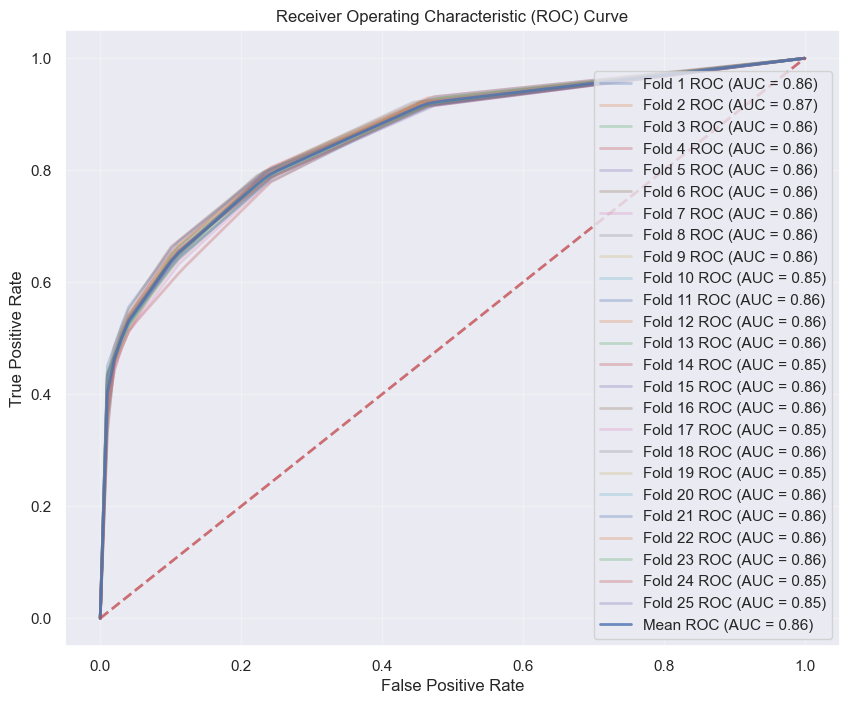

In [161]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [162]:
# menggunakan KFold CV (k=5)

from sklearn.model_selection import KFold

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store performance metrics for each fold
acc_scores = []
f1_scores = []
prec_scores = []
rec_scores = []
auc_scores = []
spec_scores = []
tprs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize KNN classifier
    knn = KNeighborsClassifier()
    
    # Fit the KNN model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    knn_predict = knn.predict(X_test)
    knn_predict_proba = knn.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    acc_scores.append(accuracy_score(y_test, knn_predict))
    f1_scores.append(f1_score(y_test, knn_predict, pos_label=0))
    prec_scores.append(precision_score(y_test, knn_predict, pos_label=0))
    rec_scores.append(recall_score(y_test, knn_predict, pos_label=0))
    auc_scores.append(roc_auc_score(y_test, knn_predict_proba))
    
    # Calculate specificity
    tn = ((knn_predict == 0) & (y_test == 0)).sum()
    fp = ((knn_predict == 1) & (y_test == 0)).sum()
    spec_scores.append(tn / (tn + fp))
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, knn_predict_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

In [163]:
# Compute average scores across all folds
avg_acc = np.mean(acc_scores)
avg_f1 = np.mean(f1_scores)
avg_prec = np.mean(prec_scores)
avg_rec = np.mean(rec_scores)
avg_auc = np.mean(auc_scores)
avg_spec = np.mean(spec_scores)

# Create a DataFrame to display the results
results_knn = pd.DataFrame([['KNN with KFold CV', avg_acc, avg_f1, avg_prec, avg_rec, avg_auc, avg_spec]],
                           columns=['Model', 'Accuracy Score', 'F1 score', 'Precision', 'Recall', 'AUC', 'Specificity'])

print(results_knn)

               Model  Accuracy Score  F1 score  Precision    Recall       AUC  \
0  KNN with KFold CV        0.813538  0.865792   0.838662  0.894792  0.859443   

   Specificity  
0     0.894792  


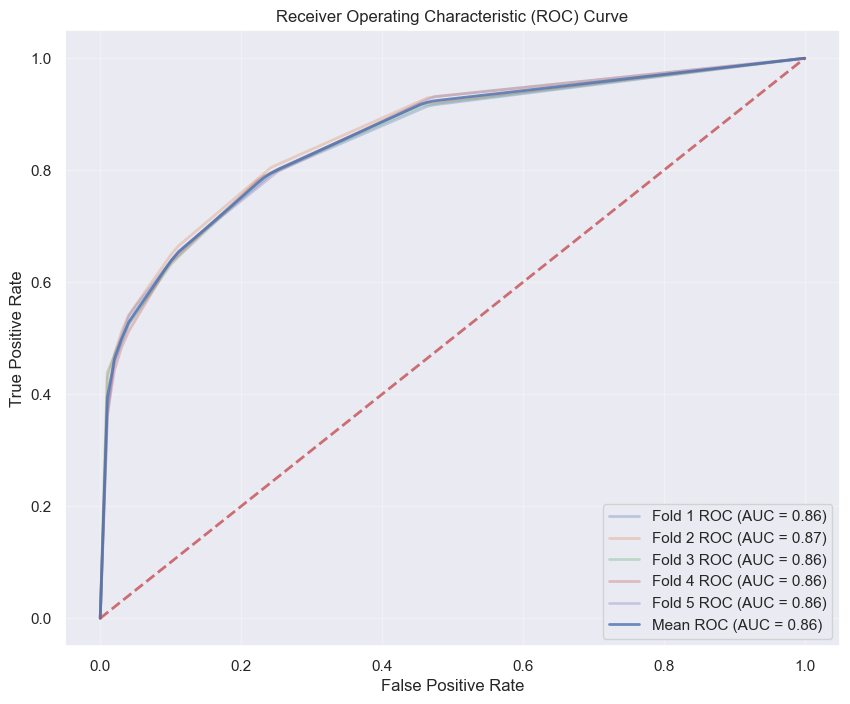

In [164]:
# Plot ROC curve for each fold
plt.figure(figsize=(10, 8))
for i in range(len(tprs)):
    plt.plot(mean_fpr, tprs[i], lw=2, alpha=0.3, label=f'Fold {i+1} ROC (AUC = {auc_scores[i]:.2f})')

# Plot the average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(auc_scores)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot chance line
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

**Interpretasi:** Dengan melakukan training and testing metode KFold Cross Validation (k=5) diperoleh hasil rata-rata accuracy, sensitifitas, presisi, spesificitas, dan ROC AUC yang sedikit lebih baik dibandingkan dengan menggunakan repeated holdout (k=5) yaitu berturut-turut sebesar 81.35%, 89.47%, 83.86%, 89.47%, dan 85.94% perbedaan hasil ini sangatlah kecil hanya 0.0... maka metode training and testing yang dipilih adalah dengan menggunakan **KFold CV**.

**Kesimpulan :** Berdasarkan hasil analisis 2 metode klasifikasi yang telah dilakukan yaitu dengan logistic regression dan KNN, metode yang paling baik untuk digunakan adalah metode KNN dengan KFold cross validation. Hal ini dikarenakan nilai accuracy yang diperoleh paling tinggi yaitu sebesar 81.35%. Selain itu tingkat sensitifitas dan spesifisitas fitur memprediksi secara akurat juga yang tertinggi dibandingkan dengan metode logistic reression yaitu sebesar 89.47%, dan 83.86%. Lalu untuk nilai ROC dan AUC diperoleh sebesar 85.94% yang mana angka ini termasuk dalam kategori baik dalam menunjukkan kekuatan diskriminatif, artinya model tersebut prediksinya dapat diandalkan.

- **RandomForest**

In [80]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42).fit(X_train, y_train)
forest_predict = forest.predict(X_test)
acc_rf = accuracy_score(y_test,forest_predict)
f1_rf = f1_score(y_test,forest_predict, pos_label=0)
prec_rf = precision_score(y_test,forest_predict, pos_label=0)
rec_rf = recall_score(y_test,forest_predict, pos_label=0)
results_rf = pd.DataFrame([['Random forest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.890989,0.920475,0.902844,0.938809


Bentar bakal ada lanjutannya:D